In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
train=pd.read_csv('train.csv')
pd.pandas.set_option('max_columns',None)
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.drop(['Id','Utilities'], axis=1, inplace=True)
#train.dtypes
train.shape

(1460, 79)

In [6]:
#null_columns=train.columns[train.isnull().any()]

In [7]:
pd.pandas.set_option('max_rows',None)

In [8]:
missing_train = train.isnull().sum()
missing_train[missing_train > 0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [9]:
#train['LotFrontage'].plot.hist(bins=30)
#train['PoolArea'].plot.hist(bins=30)
#train['MasVnrArea'].plot.hist()
#train['GarageAreaperCar'].plot.hist()

In [10]:
col1 = ['PoolQC','MiscFeature','FireplaceQu','Alley','Fence','MasVnrType' , 'GarageQual' , 
        'GarageCond' ,'GarageFinish' ,'GarageYrBlt', 'GarageType' , 'BsmtExposure' , 
        'BsmtCond' , 'BsmtQual' , 'BsmtFinType2' , 
'BsmtFinType1']
for col in col1:
    train[col].fillna('None' , inplace = True)

In [11]:
train['MasVnrArea'].fillna(0,inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace = True)


In [12]:
#train["LotAreaCut"] = pd.qcut(train.LotArea,10)
train.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median'])

LotFrontage       
                    mean median
Neighborhood                   
Blmngtn        47.142857   43.0
Blueste        24.000000   24.0
BrDale         21.562500   21.0
BrkSide        57.509804   52.0
ClearCr        83.461538   80.0
CollgCr        71.682540   70.0
Crawfor        71.804878   74.0
Edwards        68.217391   65.5
Gilbert        79.877551   65.0
IDOTRR         62.500000   60.0
MeadowV        27.800000   21.0
Mitchel        70.083333   73.0
NAmes          76.462366   73.0
NPkVill        32.285714   24.0
NWAmes         81.288889   80.0
NoRidge        91.878788   91.0
NridgHt        81.881579   88.5
OldTown        62.788991   60.0
SWISU          58.913043   60.0
Sawyer         74.437500   71.0
SawyerW        71.500000   66.5
Somerst        64.666667   73.5
StoneBr        62.700000   61.5
Timber         80.133333   85.0
Veenker        59.714286   68.0

In [13]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
train['LotFrontage'] = train.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [15]:
#train['TotRmsAbvGrd'].plot.hist()
#train['GarageArea'].plot.hist()


In [16]:
train['GarageAreaperCar']=train['GarageArea']/train['GarageCars']
train['AreaperRoom']=train['GrLivArea']/train['TotRmsAbvGrd']
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

#train.drop(['GarageArea','GarageCars','GrLivArea', 'TotRmsAbvGrd','LotAreaCut'], axis=1, inplace=True)
train.shape

(1460, 82)

In [17]:
train['GarageAreaperCar'].fillna(0,inplace=True)


In [18]:
#corr=train.iloc[:].corr()
import matplotlib.pyplot as plt


In [19]:
#fig, ax=plt.subplots(figsize=(25,20))
#_= sns.heatmap(corr,  ax=ax, annot=True, vmin=-1, linewidths=0.2)

(0, 800000)

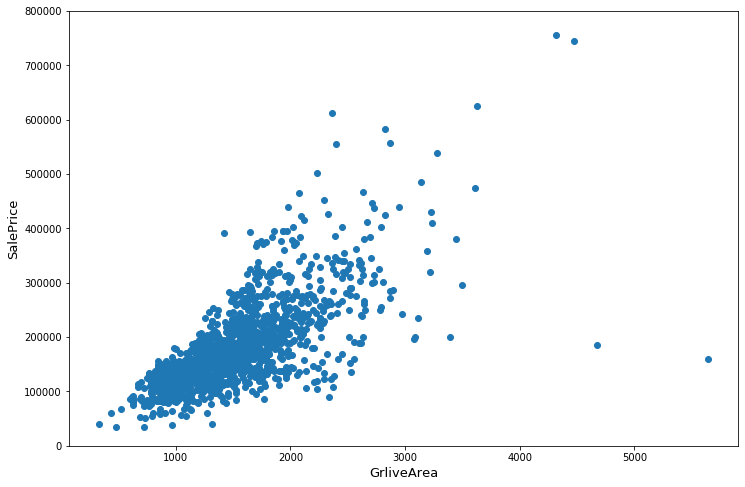

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.xlabel("GrliveArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [21]:
train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index , inplace = True)

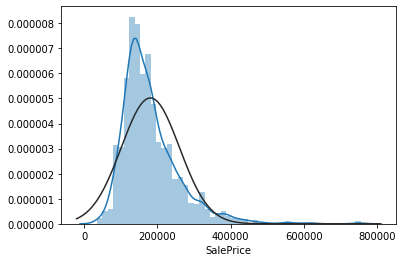

In [22]:
from scipy.stats import norm
sns.distplot(train['SalePrice'], fit=norm)

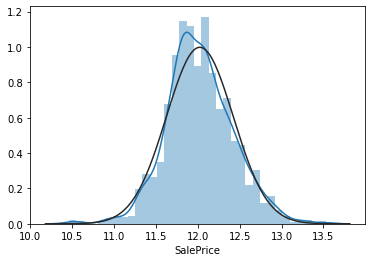

In [23]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)

In [24]:
#sns.distplot(train['TotalBsmtSF'], fit=norm)

/Users/devsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


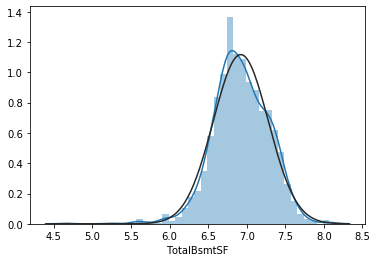

In [25]:
## because there is significant no. of zeroes(no basement) is there so we split basement>0 and 0

train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)

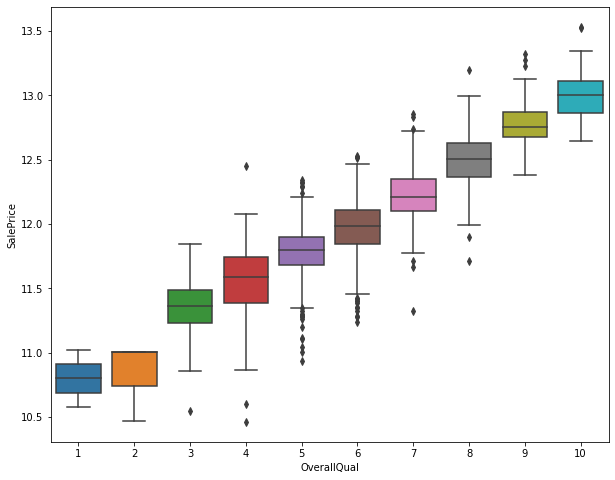

In [26]:
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=train)


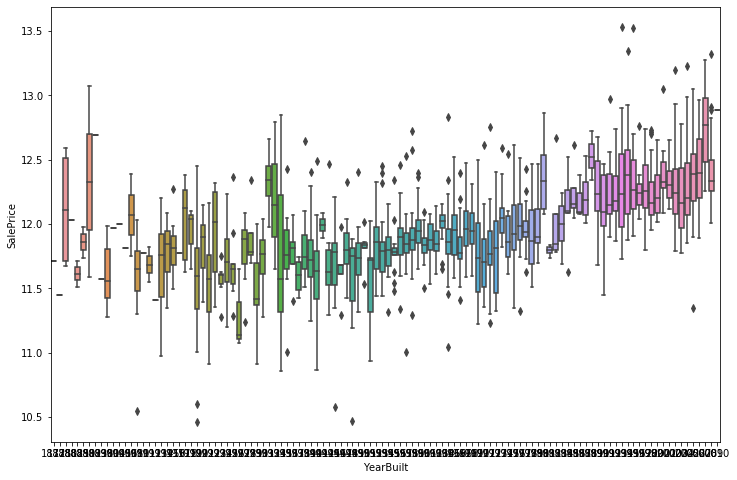

In [27]:
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=train)

In [191]:
num_cols = train._get_numeric_data().columns
len(num_cols)
#num_cols

40

In [192]:
cat_cols = train.select_dtypes(include='object').columns
len(cat_cols)
#cat_cols

43

In [193]:
encoded_categorical_df = pd.get_dummies(train, columns = cat_cols, drop_first = True)


In [194]:
num_drop = list(num_cols)
encoded_categorical_df.drop(columns=num_drop,inplace=True)


In [195]:
col_drop = list(cat_cols)
train.drop(columns=col_drop,inplace=True)

In [196]:
train.head()
train.shape

(1458, 40)

In [197]:
df=pd.concat([train, encoded_categorical_df], axis=1)
df.shape

(1458, 358)

In [198]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageAreaperCar,AreaperRoom,TotalSF,HasBsmt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,

In [199]:
#df.columns.get_loc('SalePrice')

In [200]:
#sns.distplot(df['GrLivArea'], fit=norm)

In [201]:
#df['GrLivArea'] = np.log(df['GrLivArea'])
#sns.distplot(df['GrLivArea'], fit=norm)

In [202]:
from sklearn.preprocessing import RobustScaler

In [203]:
from sklearn.preprocessing import normalize,MinMaxScaler

In [204]:
#min_max_scaler = MinMaxScaler()
robust = RobustScaler()
col_to_normalize = ['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','LotFrontage','LotArea','GarageArea','GarageCars','TotRmsAbvGrd',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','TotalSF',
        'WoodDeckSF', 'AreaperRoom','GarageAreaperCar','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df[col_to_normalize] = robust.fit_transform(df[col_to_normalize])

In [205]:
y=df['SalePrice']

In [206]:
df_test=pd.read_csv('test_data.csv')

In [207]:
features_to_delete_test = []
for col in df_test.columns:
    if col not in df.columns:
        features_to_delete_test.append(col)

In [208]:
features_to_delete_train = []
for col in df.columns:
    if col not in df_test.columns:
        features_to_delete_train.append(col)

In [209]:
features_to_delete_train

['SalePrice',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageYrBlt_1906.0',
 'GarageYrBlt_1908.0',
 'GarageYrBlt_1914.0',
 'GarageYrBlt_1929.0',
 'GarageYrBlt_1931.0',
 'GarageYrBlt_1933.

In [210]:
df.drop(columns=features_to_delete_train,inplace=True)

In [211]:
df_test.drop(columns=features_to_delete_test,axis=1, inplace=True)


In [212]:
df.shape

(1458, 311)

In [213]:
df_test.shape

(1459, 311)

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [224]:
X_train, X_valid, y_train, y_valid  = train_test_split(df,y,test_size=0.20, random_state=0)


In [225]:
lr = LinearRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_valid)
print("Mean Squared Error",mean_squared_error(y_valid, y_pred_lr))
print("Mean Absolute Error",mean_absolute_error(y_valid, y_pred_lr))
print("R2 Score",r2_score(y_valid, y_pred_lr))

Mean Squared Error 0.013019313138468077
Mean Absolute Error 0.08383278115953868
R2 Score 0.9231783635285439


In [226]:
gbr = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_valid)
print("Mean Squared Error",mean_squared_error(y_valid, y_pred_gbr))
print("Mean Absolute Error",mean_absolute_error(y_valid, y_pred_gbr))
print("R2 Score",r2_score(y_valid, y_pred_gbr))

Mean Squared Error 0.0145293546499943
Mean Absolute Error 0.0884356567592564
R2 Score 0.9142682268092327


In [227]:
las_reg = RidgeCV(cv=10).fit(X_train,y_train)
y_pred = las_reg.predict(X_valid)
print("Mean Squared Error",mean_squared_error(y_valid, y_pred))
print("Mean Absolute Error",mean_absolute_error(y_valid, y_pred))
print("R2 Score",r2_score(y_valid, y_pred))

Mean Squared Error 0.011445532066537924
Mean Absolute Error 0.07931126289820359
R2 Score 0.9324646012975897


In [ ]:
sample_submission= pd.read_csv('sample_submission.csv')

In [ ]:
Id = sample_submission["Id"]
predicted_test = []
for x in lr.predict(df_test):
    predicted_test.append(x)
predicted_test_value = pd.DataFrame({ 'Id': Id,
                        'SalePrice': predicted_test })
predicted_test_value.to_csv("PredictedTestScore.csv", index=False)